In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread

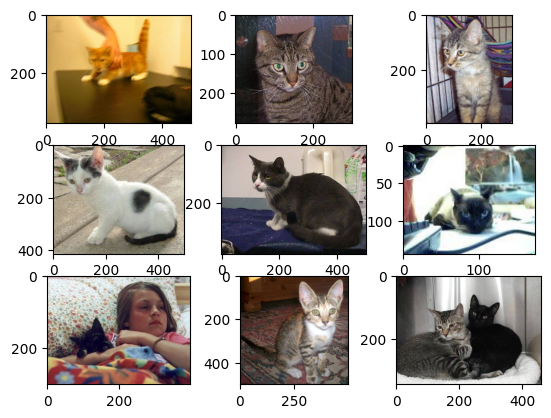

In [2]:
data_dir = Path("data")
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 filename = Path("train") / f"cat.{i}.jpg"
 image = imread(filename)
 plt.imshow(image)
# show the figure
plt.show()

In [3]:
# import numpy as np
# import shutil

# val_ratio = 0.2
# rng = np.random.default_rng(seed=42)

# for file in Path("train").glob("*.jpg"):
#     if rng.random() < val_ratio:
#         target_dir = data_dir / "test"
#         if file.name.startswith("cat"):
#             target_dir = target_dir / "cats"
#         else:
#             target_dir = target_dir / "dogs"
#         shutil.copy(file, target_dir)
#     else:
#         target_dir = data_dir / "train"
#         if file.name.startswith("cat"):
#             target_dir = target_dir / "cats"
#         else:
#             target_dir = target_dir / "dogs"
#         shutil.copy(file, target_dir)  


In [14]:
from keras import Sequential, Model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras.applications import VGG16
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [15]:
def define_model() -> Model:
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    
    for layer in model.layers:
        layer.trainable = False
        
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation="relu", kernel_initializer="he_uniform")(flat1)
    output = Dense(1, activation="sigmoid")(class1)
    
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

In [19]:
model = define_model()

data_generator = ImageDataGenerator(featurewise_center=True)
data_generator.mean = [123.68, 116.779, 103.939]

training_iterator = data_generator.flow_from_directory(
    data_dir / "train",
    class_mode="binary",
    batch_size=64,
    target_size=(224, 224)
)
test_iterator = data_generator.flow_from_directory(
    data_dir / "test",
    class_mode="binary",
    batch_size=64,
    target_size=(224, 224)
)

history = model.fit_generator(
    training_iterator,
    steps_per_epoch=len(training_iterator),
    epochs=5,
    validation_data=test_iterator,
    validation_steps=len(test_iterator),
    verbose=1
)

Found 19991 images belonging to 2 classes.
Found 5009 images belonging to 2 classes.
Epoch 1/5


C:\Users\jdide\AppData\Local\Temp\ipykernel_5536\2747879458.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


313/313 [==============================] - 1500s 5s/step - loss: 0.2853 - accuracy: 0.9639 - val_loss: 0.0592 - val_accuracy: 0.9770
Epoch 2/5
313/313 [==============================] - 1448s 5s/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0593 - val_accuracy: 0.9774
Epoch 3/5
313/313 [==============================] - 1404s 4s/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0671 - val_accuracy: 0.9776
Epoch 4/5
313/313 [==============================] - 1410s 5s/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0763 - val_accuracy: 0.9784
Epoch 5/5
313/313 [==============================] - 1394s 4s/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0836 - val_accuracy: 0.9786


In [ ]:
import sys

def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 # save plot to file
 filename = sys.argv[0].split('/')[-1]
 plt.savefig(filename + '_plot.png')
 plt.close()

In [20]:
model.save("final_model.h5")

c:\Users\jdide\OneDrive - Universidad EAFIT\Escritorio\cats-dogs-classification\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
